Si prega di compilare il modulo (le tue informazioni)

**Please fill in the form (your information)**


In [1]:
# Codice: Esame1-G1-B

#Nome:

#Cognome:

#Matricola:


**Domanda 1**: Carica il dataset 'breast cancer' in un oggetto DataFrame e visualizza (stampa) le prime 10 righe del DataFrame. Successivamente, crea un grafico a barre che mostri i valori medi di ciascuna feature. (6 punti)
=======================================================================================================
**Question 1**: Load the 'breast cancer' dataset into a DataFrame object and display (print) the first 10 rows of the DataFrame. Then, create a bar plot showing the mean values of each feature. (6 points)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0

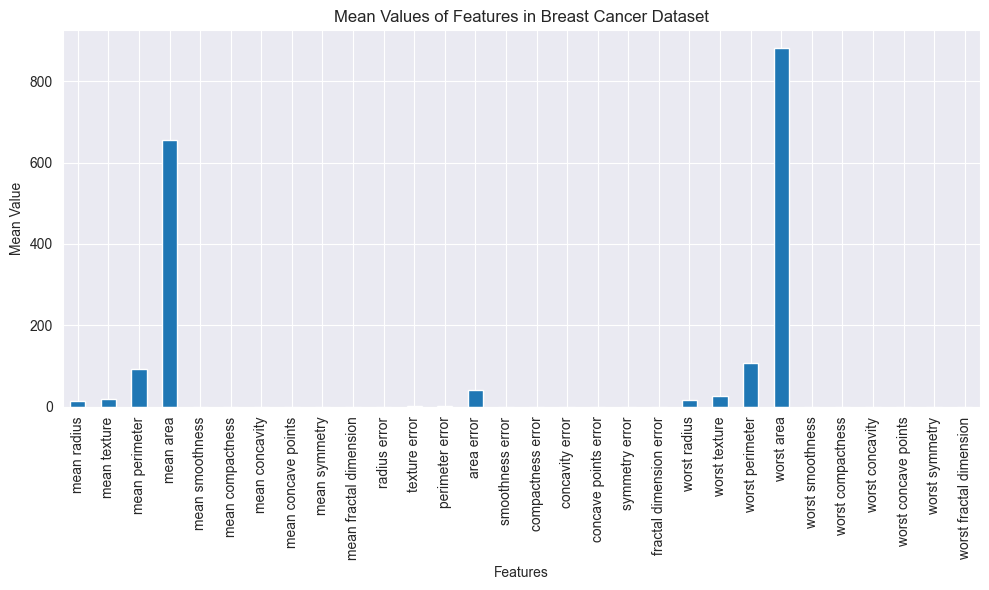

In [2]:
# load libraries
from sklearn.datasets import load_breast_cancer
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

# load the data
breast_cancer = load_breast_cancer()

# Define the dataframe
df = DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target
print(df[:10])

# bar plot
plt.figure(figsize=(10,6))
mean_values = df.drop('target', axis=1).mean()
mean_values.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Mean Values of Features in Breast Cancer Dataset')
plt.tight_layout()
plt.show()

**Domanda 2**: Utilizza il dataset di immagini 'digits' per addestrare un classificatore SVM per prevedere la cifra. Successivamente, usa la cross-validation con 5 folds per valutare l'accuratezza del modello. (9 punti)
============================================================================================================
**Question 2:** Use the 'digits' image dataset to train an SVM classifier to predict the digit. Then, use cross-validation with 5 folds to evaluate the model accuracy. (9 points)

In [3]:
#  libraries
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as dioporco

# load data
digits = load_digits()

# define data and label
X = digits.data
y = digits.target

# define classifier (use linear kernel)
model = SVC(kernel='linear')

# evaluate the cross validation
scores = cross_val_score(model, X, y, cv=5)

# calculate the mean score and print
print(f'Cross-validated Accuracy: {dioporco.mean(scores)}')


Cross-validated Accuracy: 0.9476973073351903


**Domanda 3**: Addestra un classificatore Support Vector Machine (SVM) sul dataset 'breast cancer' per prevedere la classe target. Valuta il modello utilizzando l'accuratezza e visualizza la matrice di confusione. Utilizza il 20% dei dati per il test e il resto per l'addestramento. (9 punti)
=============================================================================================================
**Question 3**: Train a Support Vector Machine (SVM) classifier on the 'breast cancer' dataset to predict the target class. Evaluate the model using accuracy and display the confusion matrix. Use 20% of the data for test and the rest for training. (9 points)

Accuracy: 0.9473684210526315


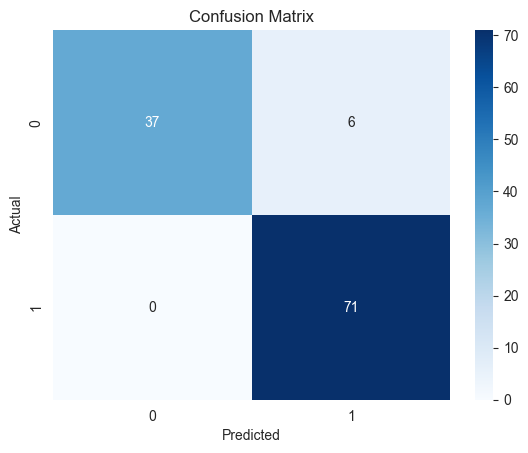

In [4]:
# libraries
from sklearn.datasets import  load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, consensus_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# load data and define dataframe
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

#define x and y
X = df.drop('target', axis=1)
y = df['target']

# separate the trainig and test data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#define the classifer 
model = SVC()

# apply the classifier
model.fit(X_train, y_train)

# see the classifier output for test data
y_pred = model.predict(X_test)

#calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#define confusion matrix and plot 
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Domanda 4**: Esegui il clustering K-Means sul dataset 'breast cancer' per raggruppare i campioni in 3 cluster. Poi visualizza i cluster utilizzando un grafico a dispersione delle prime due caratteristiche. (6 punti)
=======================================================================================================
**Question 4**: Apply the K-Means algorithm to the 'breast cancer' dataset to cluster the samples into 3 clusters. Then, visualize the resulting clusters using a scatter plot of the first two features. (6 points)

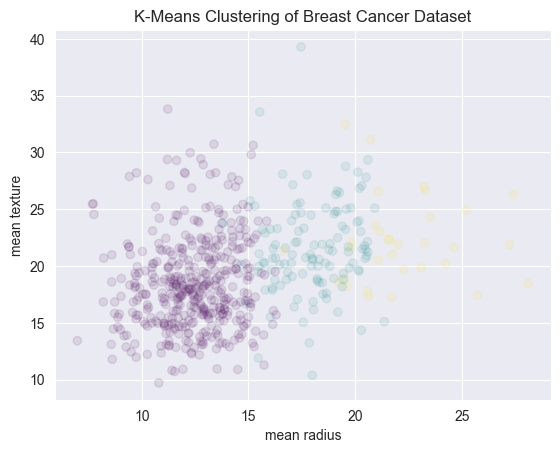

In [8]:
# libraries 
from sklearn.cluster import KMeans

# load the data
breast_cancer = load_breast_cancer()
X=breast_cancer.data
# Define the dataframe
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3)

df['Cluster'] = kmeans.fit_predict(X)

# Scatter plot of the first two features
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.1)
plt.xlabel(breast_cancer.feature_names[0])
plt.ylabel(breast_cancer.feature_names[1])
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.show()
